## Shreyansh Kuntal
## 22324018
### shreyansh_k@ph.iitr.ac.in
## Credit Card Default Prediction - Jupyter Notebook

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import shap
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc, fbeta_score, make_scorer

In [3]:
train_file_name = 'train_dataset_final1.csv'
valid_file_name = 'validate_dataset_final.csv'
df_train = pd.read_csv(train_file_name)
df_valid = pd.read_csv(valid_file_name)

In [4]:
df_train.head()

,Customer_ID,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,...,Bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,AVG_Bill_amt,PAY_TO_BILL_ratio,next_month_default
0,5017,2,0,2,60000,25.0,2,2,2,0,...,20750.63,2000.21,0.00,1134.85,1821.78,1500.03,1500.24,41511.50,0.03,0
1,5018,2,1,1,290000,24.0,0,0,-2,-2,...,1350.30,0.00,0.17,0.00,2700.10,0.00,1349.72,2534.50,0.27,0
2,5019,1,0,2,180000,63.0,0,0,0,0,...,52991.51,2086.94,2199.99,1845.66,2000.35,1923.00,1999.78,50422.00,0.04,0
3,5020,1,1,2,210000,43.0,0,0,0,0,...,76945.47,3348.07,3380.91,3400.45,2683.97,2744.00,2892.10,86229.50,0.04,0
4,5021,2,0,1,280000,32.0,-2,-2,-2,-2,...,1.35,999.78,3186.27,45027.78,2100.09,0.01,0.27,11814.33,0.72,0


In [5]:
df_train.columns

Index(['Customer_ID', 'marriage', 'sex', 'education', 'LIMIT_BAL', 'age',
       'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'Bill_amt1',
       'Bill_amt2', 'Bill_amt3', 'Bill_amt4', 'Bill_amt5', 'Bill_amt6',
       'pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6',
       'AVG_Bill_amt', 'PAY_TO_BILL_ratio', 'next_month_default'],
      dtype='object')

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25247 entries, 0 to 25246
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer_ID         25247 non-null  int64  
 1   marriage            25247 non-null  int64  
 2   sex                 25247 non-null  int64  
 3   education           25247 non-null  int64  
 4   LIMIT_BAL           25247 non-null  int64  
 5   age                 25121 non-null  float64
 6   pay_0               25247 non-null  int64  
 7   pay_2               25247 non-null  int64  
 8   pay_3               25247 non-null  int64  
 9   pay_4               25247 non-null  int64  
 10  pay_5               25247 non-null  int64  
 11  pay_6               25247 non-null  int64  
 12  Bill_amt1           25247 non-null  float64
 13  Bill_amt2           25247 non-null  float64
 14  Bill_amt3           25247 non-null  float64
 15  Bill_amt4           25247 non-null  float64
 16  Bill

In [7]:
df_train.describe()

,Customer_ID,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,...,Bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,AVG_Bill_amt,PAY_TO_BILL_ratio,next_month_default
count,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000,25121.000000,25247.000000,25247.000000,25247.000000,25247.000000,...,25247.000000,25247.000000,2.524700e+04,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000
mean,17640.000000,1.551907,0.604111,1.852101,168342.060443,35.438199,-0.042857,-0.159544,-0.190359,-0.241415,...,38806.221029,5718.624966,6.047352e+03,5288.910651,4865.960834,4906.766828,5270.499287,44859.647485,0.362962,0.190399
std,7288.325459,0.522629,0.489050,0.797379,129892.784807,9.174998,1.099315,1.173990,1.172636,1.146753,...,59182.792531,16806.842125,2.400962e+04,17851.879609,15979.116544,15860.726852,17960.816915,62819.226119,5.047206,0.392624
min,5017.000000,0.000000,0.000000,0.000000,10000.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,-56043.170000,-546.930000,0.000000
25%,11328.500000,1.000000,0.000000,1.000000,50000.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,1241.710000,999.985000,9.219100e+02,399.990000,300.150000,262.365000,130.070000,4858.670000,0.040000,0.000000
50%,17640.000000,2.000000,1.000000,2.000000,140000.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,17102.580000,2145.020000,2.026830e+03,1844.300000,1500.100000,1513.790000,1500.040000,21102.830000,0.090000,0.000000
75%,23951.500000,2.000000,1.000000,2.000000,240000.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,49245.195000,5031.150000,5.000190e+03,4600.640000,4014.990000,4099.890000,4018.780000,57136.580000,0.590000,0.000000
max,30263.000000,3.000000,1.000000,6.000000,1000000.000000,79.000000,8.000000,8.000000,8.000000,7.000000,...,961663.620000,873551.980000,1.684259e+06,896040.150000,621000.080000,426529.180000,528666.150000,877313.830000,205.380000,1.000000


<h2>Missing values</h2>

In [8]:
df_train.isnull().sum()

Customer_ID             0
marriage                0
sex                     0
education               0
LIMIT_BAL               0
age                   126
pay_0                   0
pay_2                   0
pay_3                   0
pay_4                   0
pay_5                   0
pay_6                   0
Bill_amt1               0
Bill_amt2               0
Bill_amt3               0
Bill_amt4               0
Bill_amt5               0
Bill_amt6               0
pay_amt1                0
pay_amt2                0
pay_amt3                0
pay_amt4                0
pay_amt5                0
pay_amt6                0
AVG_Bill_amt            0
PAY_TO_BILL_ratio       0
next_month_default      0
dtype: int64

<h4> Heatmap of missing values </h4>

<Axes: >

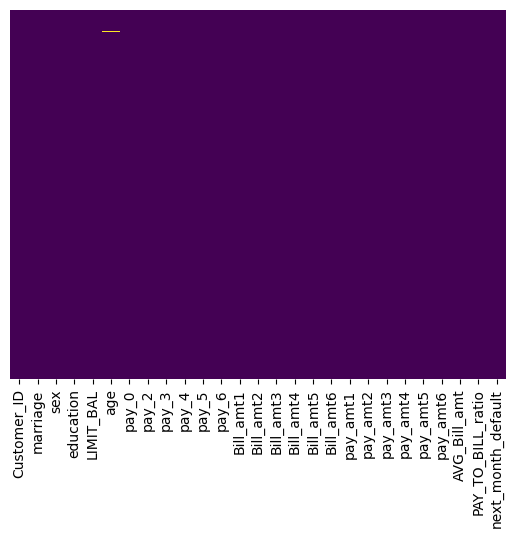

In [9]:
sns.heatmap(df_train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

<h4> A total of 126 values are missing from the 'age' column only</h4>

# Exploratory Data Analysis

### Categorical Variables

#### Marriage

In [10]:
df_train['marriage'].value_counts()

marriage
2    13441
1    11480
3      273
0       53
Name: count, dtype: int64

1 = Married;
2 = Single;
3 = Others;
0 = No description given

/tmp/ipykernel_13035/621587670.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_marriage.replace({'marriage' : {1 : 'married', 2 : 'single', 3 : 'others', 0 : 'no description'}}, inplace = True)


<Axes: xlabel='marriage', ylabel='count'>

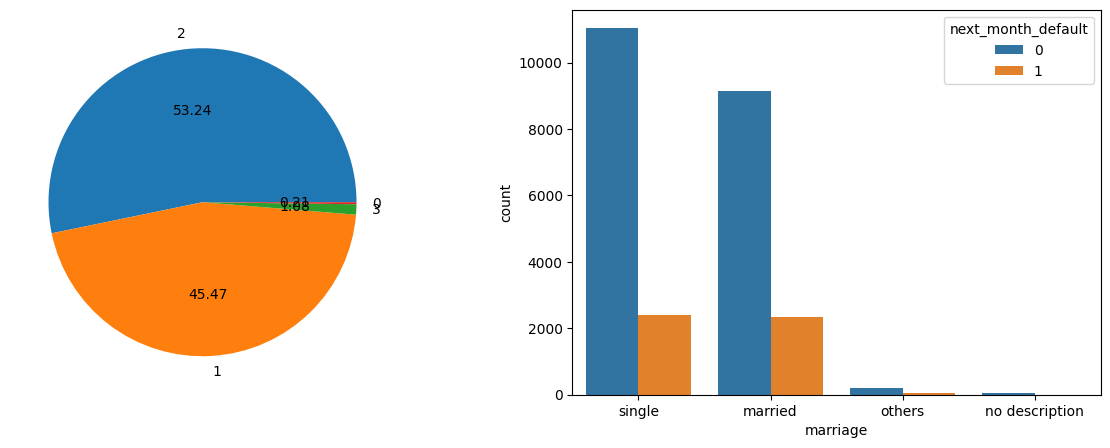

In [11]:
df_marriage = df_train[['marriage', 'next_month_default']]
df_marriage.replace({'marriage' : {1 : 'married', 2 : 'single', 3 : 'others', 0 : 'no description'}}, inplace = True)
fig, axes = plt.subplots(ncols=2, figsize=(15, 5))
axes[0].pie(df_train['marriage'].value_counts(), labels=dict(df_train['marriage'].value_counts()), autopct='%.2f')
sns.countplot(x='marriage', hue='next_month_default', data=df_marriage)

In [12]:
default_marriage = df_marriage.groupby('marriage')['next_month_default'].mean()
print(default_marriage)

marriage
married           0.203746
no description    0.075472
others            0.219780
single            0.178856
Name: next_month_default, dtype: float64


##### Observation : Proportion of defaulters are higher in Married than Singles. Reasons may include mortgage/rent, childcare, education.

#### Sex

In [13]:
df_train['sex'].value_counts()

sex
1    15252
0     9995
Name: count, dtype: int64

0 = Female; 1 = Male

/tmp/ipykernel_13035/2137065002.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sex.replace({'sex' : {0 : 'Female', 1 : 'Male'}}, inplace = True)


<Axes: xlabel='sex', ylabel='count'>

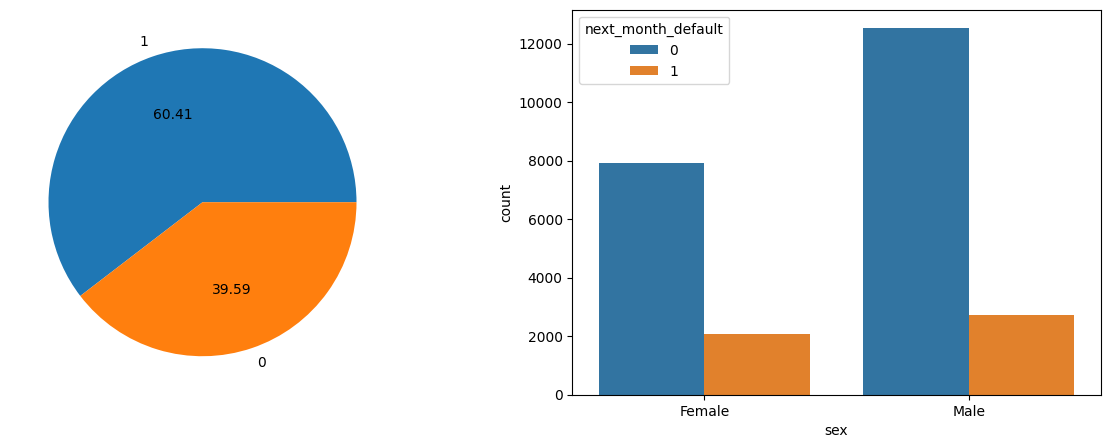

In [14]:
df_sex = df_train[['sex', 'next_month_default']]
df_sex.replace({'sex' : {0 : 'Female', 1 : 'Male'}}, inplace = True)
fig, axes = plt.subplots(ncols=2, figsize=(15, 5))
axes[0].pie(df_train['sex'].value_counts(), labels=dict(df_train['sex'].value_counts()), autopct='%.2f')
sns.countplot(x='sex', hue='next_month_default', data=df_sex)

In [15]:
default_sex = df_sex.groupby('sex')['next_month_default'].mean()
print(default_sex)

sex
Female    0.208604
Male      0.178468
Name: next_month_default, dtype: float64


##### Observation : Proportion of defaulters are higher in females. On average females may have lower incomes. If females get smaller credit offers they are more vulnerable to missing payments. Single female parents might also find difficult to repay on-time.

#### Education

In [16]:
df_train['education'].value_counts()

education
2    11717
1     8988
3     4115
5      253
4      116
6       44
0       14
Name: count, dtype: int64

Compiling values 0,4,5,6 to 4(others) as they are not descriptive.

In [17]:
id_other = (df_train['education'] == 0) | (df_train['education'] == 4) | (df_train['education'] == 5) | (df_train['education'] == 6)
df_train.loc[id_other, 'education'] = 4
df_train['education'].value_counts()

education
2    11717
1     8988
3     4115
4      427
Name: count, dtype: int64

1 = Graduate School; 2 = University; 3 = High School; 4 = Others

/tmp/ipykernel_13035/395779404.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_education.replace({'education' : {1 : 'Graduate School', 2 : 'University', 3 : 'High School', 4 : 'Others'}}, inplace = True)


<Axes: xlabel='education', ylabel='count'>

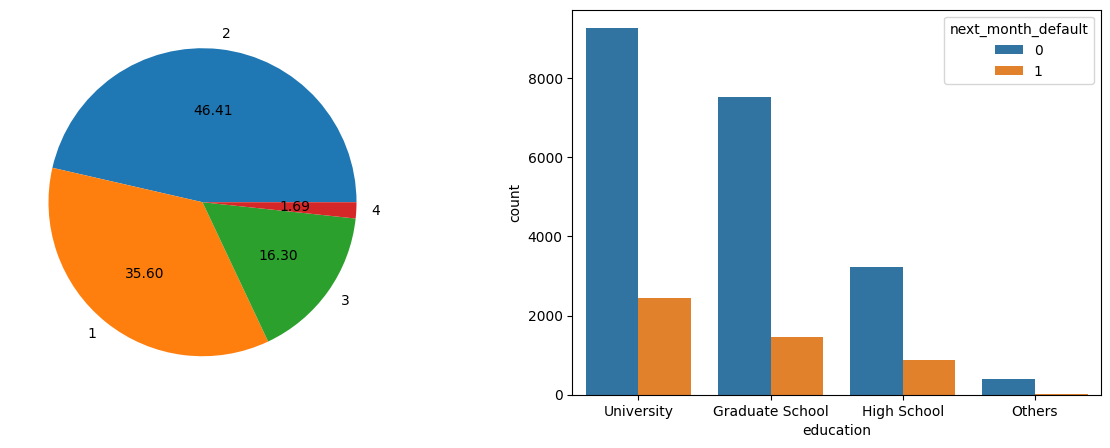

In [18]:
df_education = df_train[['education', 'next_month_default']]
df_education.replace({'education' : {1 : 'Graduate School', 2 : 'University', 3 : 'High School', 4 : 'Others'}}, inplace = True)
fig, axes = plt.subplots(ncols=2, figsize=(15, 5))
axes[0].pie(df_train['education'].value_counts(), labels=dict(df_train['education'].value_counts()), autopct='%.2f')
sns.countplot(x='education', hue='next_month_default', data=df_education)

In [19]:
default_education = df_education.groupby('education')['next_month_default'].mean()
print(default_education)

education
Graduate School    0.161771
High School        0.213123
Others             0.060890
University         0.209098
Name: next_month_default, dtype: float64


##### Customers with graduate-level education have significantly lower proportion of defaulters than high school and university level customers.

#### Monthly payment status

In [20]:
#renaming columns for better readability
df_train.rename(columns={'pay_0':'pay_june','pay_2':'pay_may','pay_3':'pay_apr','pay_4':'pay_mar','pay_5':'pay_feb','pay_6':'pay_jan'},inplace=True)
df_train.rename(columns={'Bill_amt1':'Bill_amt_june','Bill_amt2':'Bill_amt_may','Bill_amt3':'Bill_amt_apr','Bill_amt4':'Bill_amt_mar','Bill_amt5':'Bill_amt_feb','Bill_amt6':'Bill_amt_jan'}, inplace = True)
df_train.rename(columns={'pay_amt1':'pay_amt_june','pay_amt2':'pay_amt_may','pay_amt3':'pay_amt_apr','pay_amt4':'pay_amt_mar','pay_amt5':'pay_amt_feb','pay_amt6':'pay_amt_jan'},inplace=True)

In [21]:
df_train.head()

,Customer_ID,marriage,sex,education,LIMIT_BAL,age,pay_june,pay_may,pay_apr,pay_mar,...,Bill_amt_jan,pay_amt_june,pay_amt_may,pay_amt_apr,pay_amt_mar,pay_amt_feb,pay_amt_jan,AVG_Bill_amt,PAY_TO_BILL_ratio,next_month_default
0,5017,2,0,2,60000,25.0,2,2,2,0,...,20750.63,2000.21,0.00,1134.85,1821.78,1500.03,1500.24,41511.50,0.03,0
1,5018,2,1,1,290000,24.0,0,0,-2,-2,...,1350.30,0.00,0.17,0.00,2700.10,0.00,1349.72,2534.50,0.27,0
2,5019,1,0,2,180000,63.0,0,0,0,0,...,52991.51,2086.94,2199.99,1845.66,2000.35,1923.00,1999.78,50422.00,0.04,0
3,5020,1,1,2,210000,43.0,0,0,0,0,...,76945.47,3348.07,3380.91,3400.45,2683.97,2744.00,2892.10,86229.50,0.04,0
4,5021,2,0,1,280000,32.0,-2,-2,-2,-2,...,1.35,999.78,3186.27,45027.78,2100.09,0.01,0.27,11814.33,0.72,0


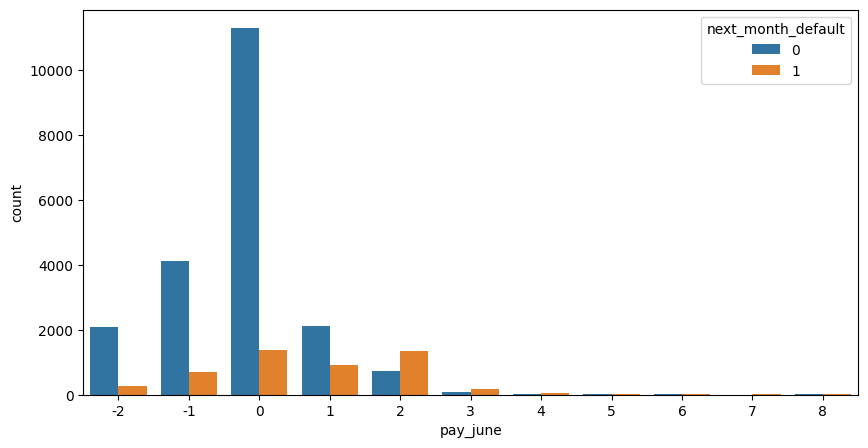

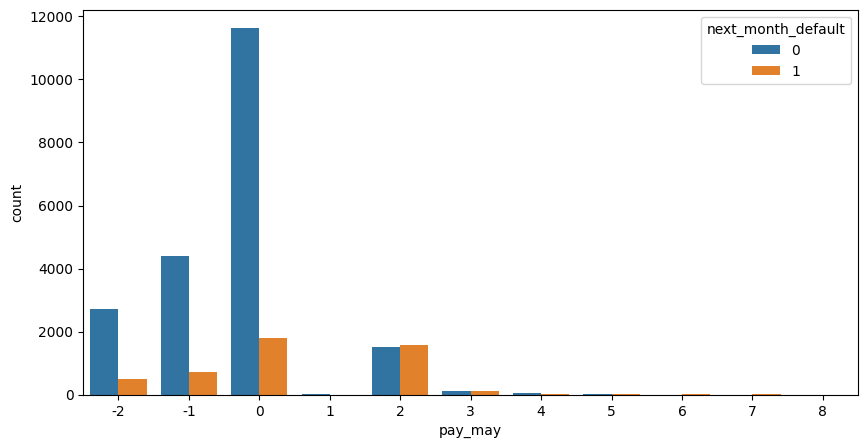

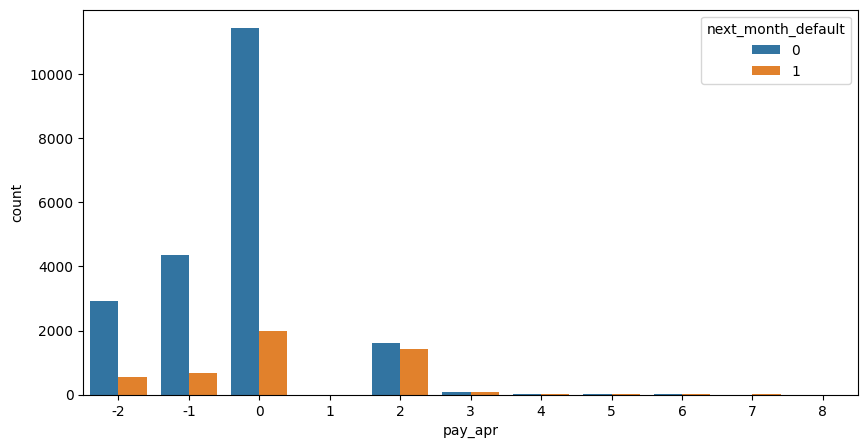

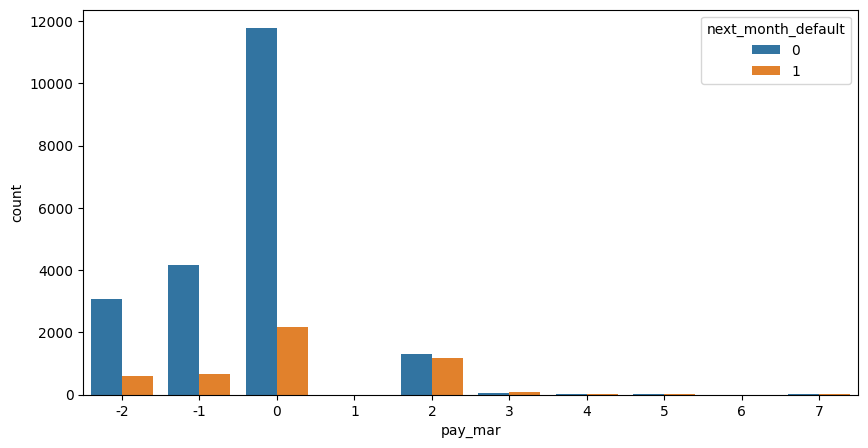

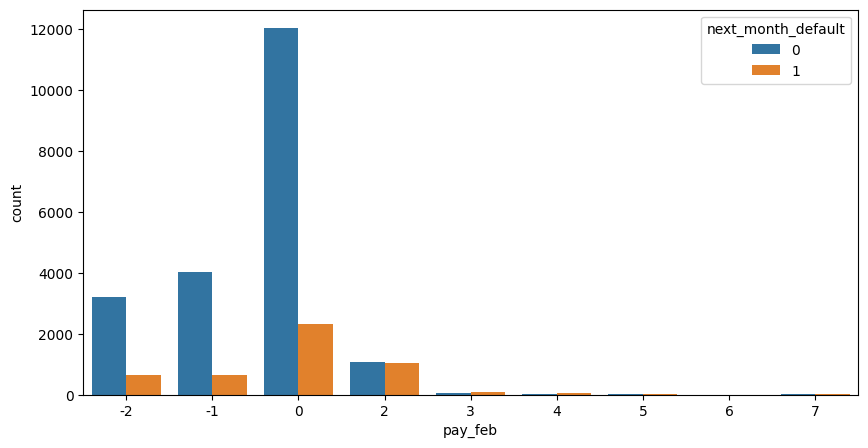

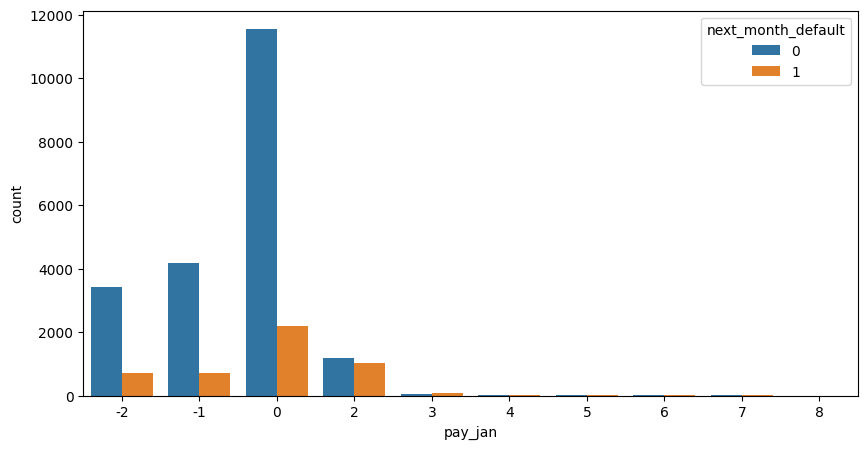

In [22]:
pay_col = ['pay_june', 'pay_may', 'pay_apr', 'pay_mar', 'pay_feb', 'pay_jan']
for col in pay_col:
  plt.figure(figsize=(10,5))
  sns.countplot(x = col, hue = 'next_month_default', data = df_train)

### Numerical Variables

#### LIMIT_BAL

In [23]:
df_train['LIMIT_BAL'].describe()

count      25247.000000
mean      168342.060443
std       129892.784807
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

/tmp/ipykernel_13035/3092959309.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='next_month_default', y='LIMIT_BAL', data=df_train, palette={'1' : 'red', '0' : 'green'})


<Axes: xlabel='next_month_default', ylabel='LIMIT_BAL'>

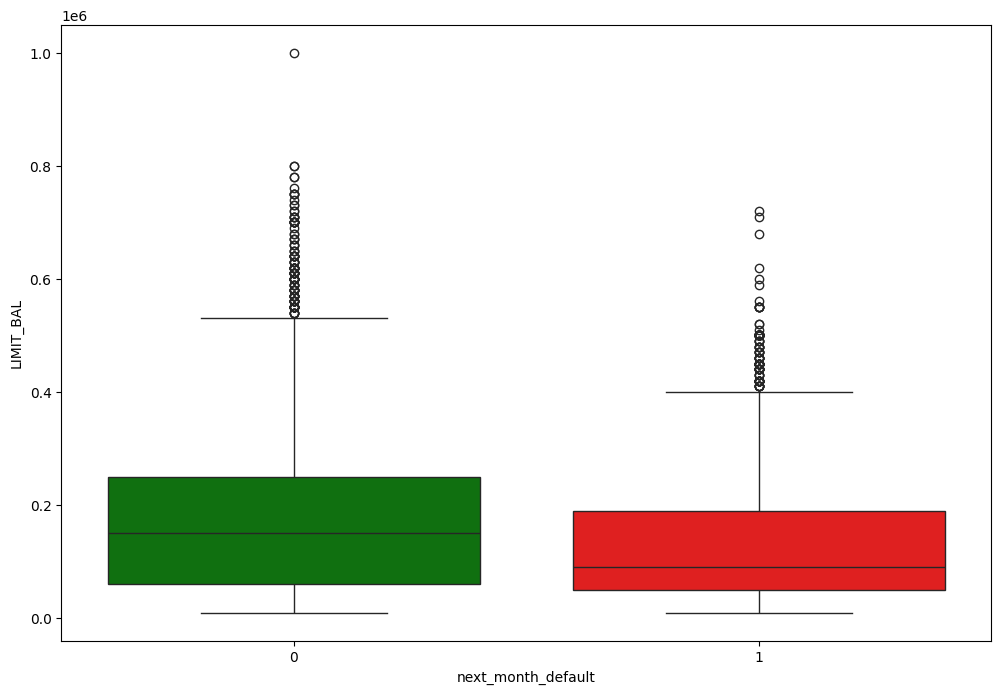

In [24]:
plt.figure(figsize=(12,8))
sns.boxplot(x='next_month_default', y='LIMIT_BAL', data=df_train, palette={'1' : 'red', '0' : 'green'})

##### Observation: Median and maximum of credit limits of defaulters are lower. People with lower credit balance are more likely to default. This shows that bank is already cautious to increasing credit limit.

#### Age

In [25]:
df_train['age'].describe()

count    25121.000000
mean        35.438199
std          9.174998
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: age, dtype: float64

In [26]:
#changing data type of age to int
age_notnull = df_train['age'].notnull()
df_train['age'] = df_train['age'].astype('Int64')

In [27]:
df_train['age'].value_counts()

age
29    1353
27    1258
28    1188
30    1162
26    1049
31    1027
34     979
25     976
33     976
35     951
24     948
32     946
36     944
37     876
39     806
38     800
23     774
40     741
41     695
42     659
44     566
43     561
45     513
46     491
22     468
47     404
48     382
49     358
50     333
51     290
53     262
52     247
54     206
55     171
56     148
57     104
58      96
59      80
21      58
60      58
61      44
62      37
63      24
64      21
66      21
65      20
67      13
69      12
70       9
68       5
72       3
71       2
75       2
73       2
79       1
74       1
Name: count, dtype: Int64

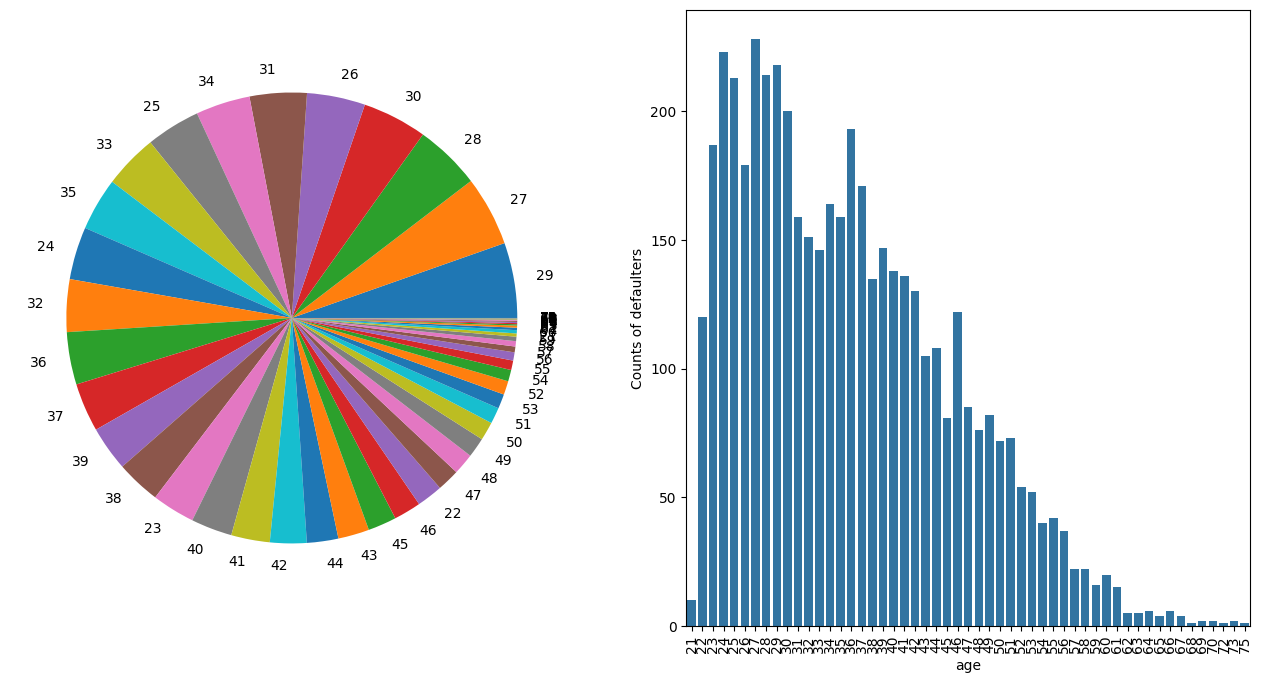

In [28]:
fig, axes = plt.subplots(ncols=2, figsize=(16, 8))
axes[0].pie(df_train['age'].value_counts(), labels=dict(df_train['age'].value_counts()))
sns.barplot(data=df_train.groupby('next_month_default')['age'].value_counts()[1])
plt.xticks(rotation=90);
plt.ylabel('Counts of defaulters');

##### Observation: Gaussian represent most defaulters are around 27 years old with fewer as we go older or younger

/tmp/ipykernel_13035/2529519323.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="next_month_default", y="age", data=df_train, palette={'1' : 'red', '0' : 'green'})


<Axes: xlabel='next_month_default', ylabel='age'>

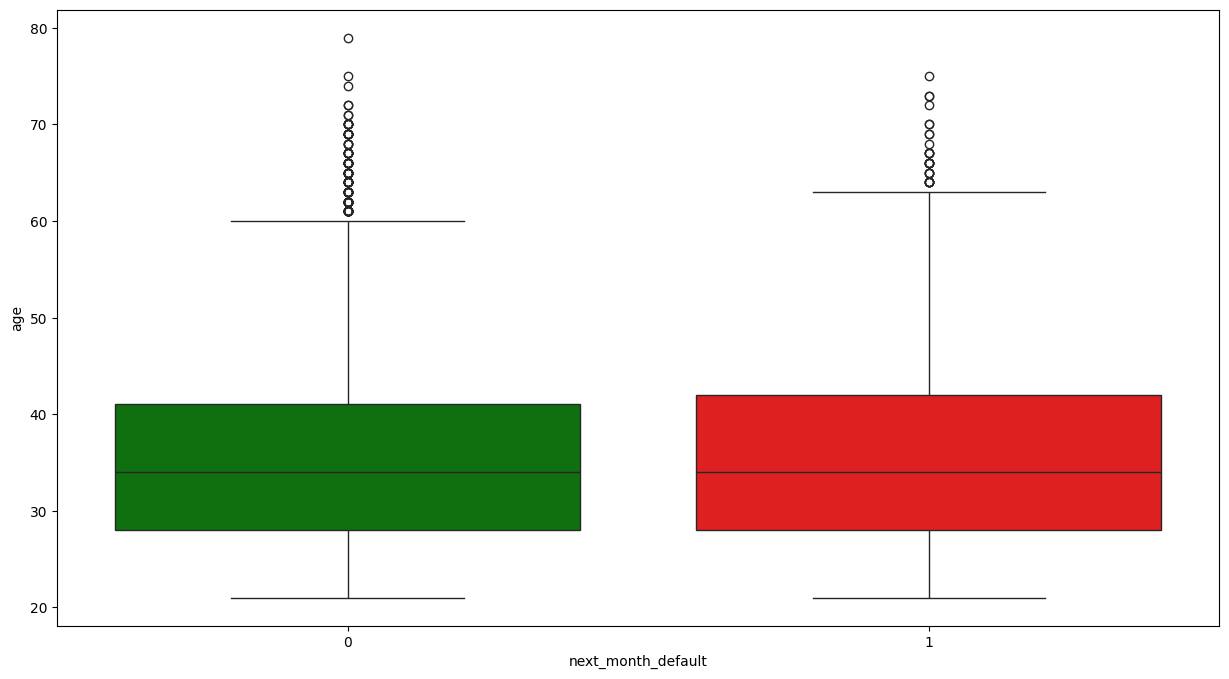

In [29]:
plt.figure(figsize=(15,8))
sns.boxplot(x="next_month_default", y="age", data=df_train, palette={'1' : 'red', '0' : 'green'})

##### Observation: Most of the defaulters have made partial or minimum payment(pay_m = 0) followed by payment delays of 2 months(pay_m = 2).

#### Monthly bill amount

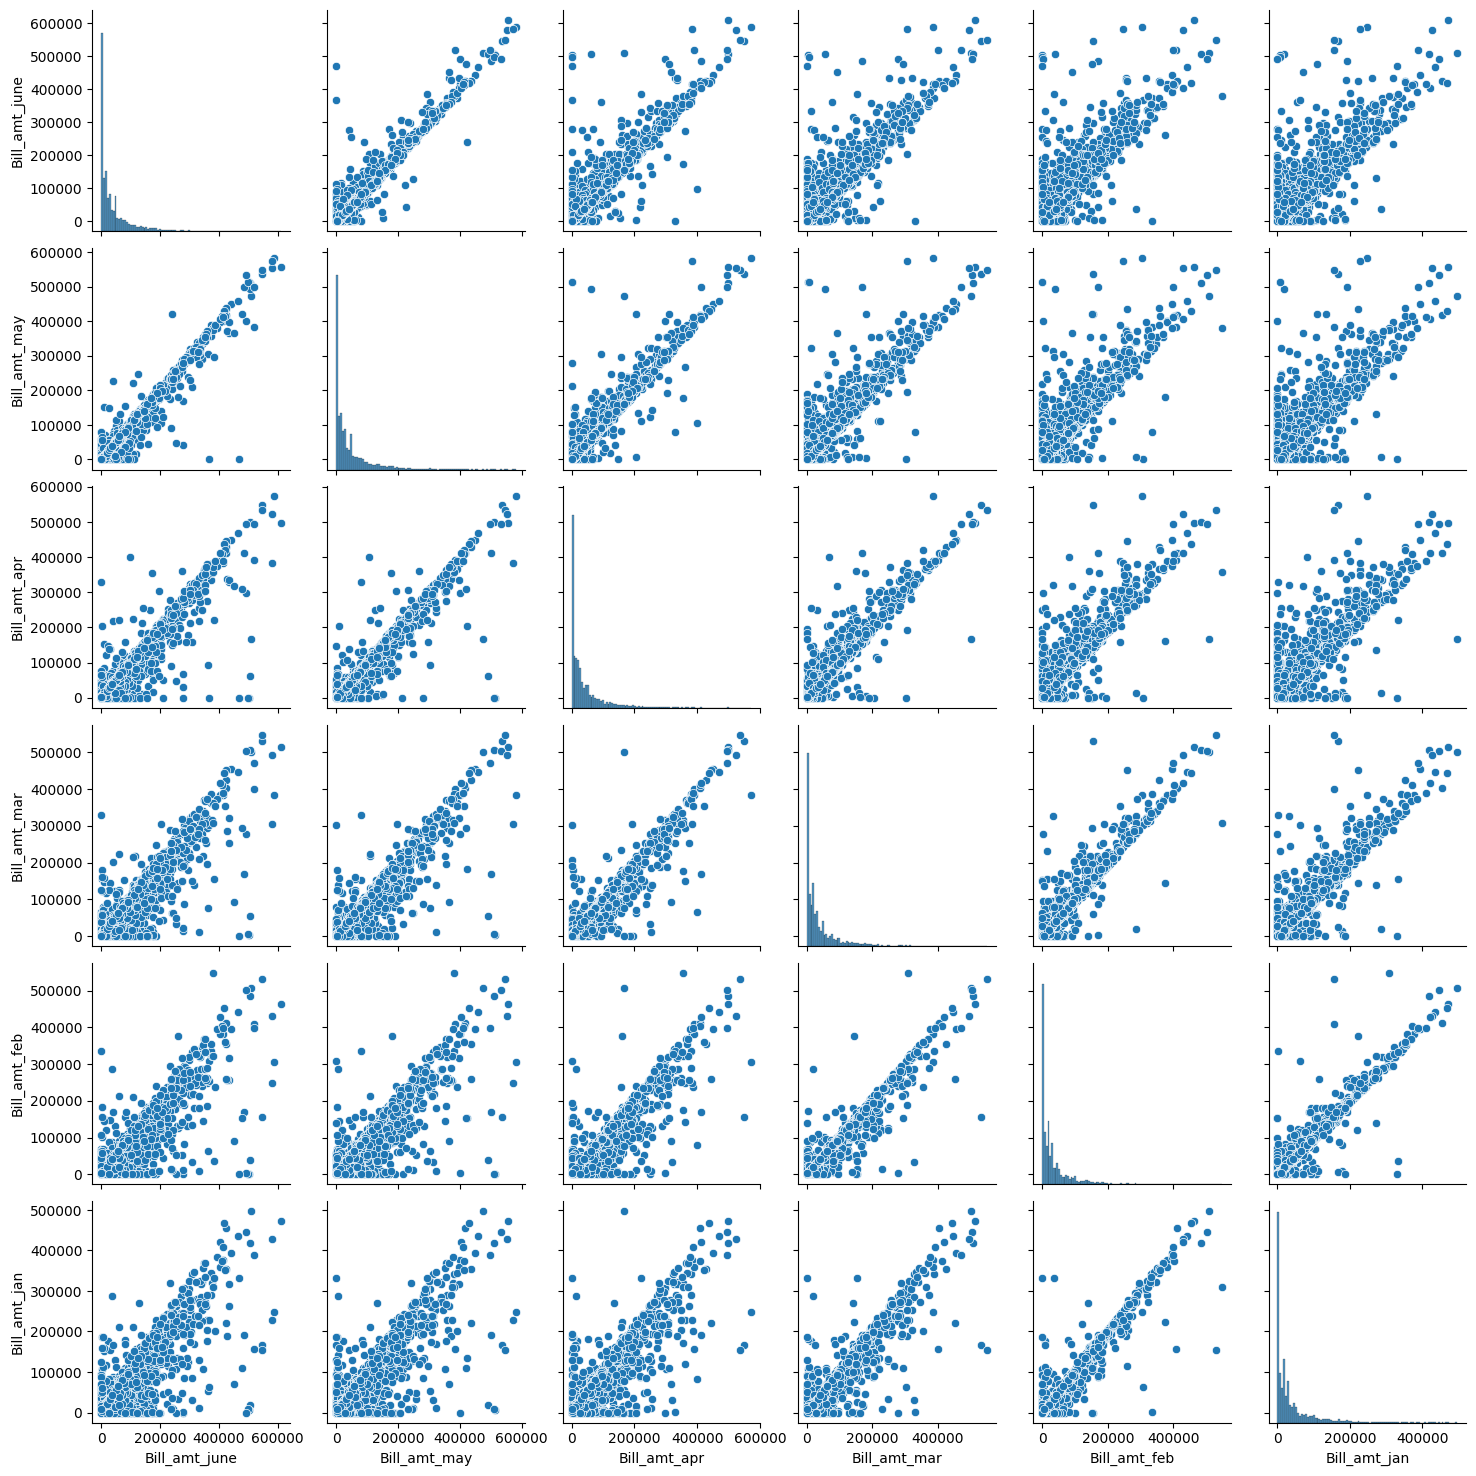

In [30]:
bill_col = df_train.loc[df_train['next_month_default'] == 1,['Bill_amt_june', 'Bill_amt_may', 'Bill_amt_apr', 'Bill_amt_mar', 'Bill_amt_feb', 'Bill_amt_jan']]
sns.pairplot(data=bill_col)

<Axes: >

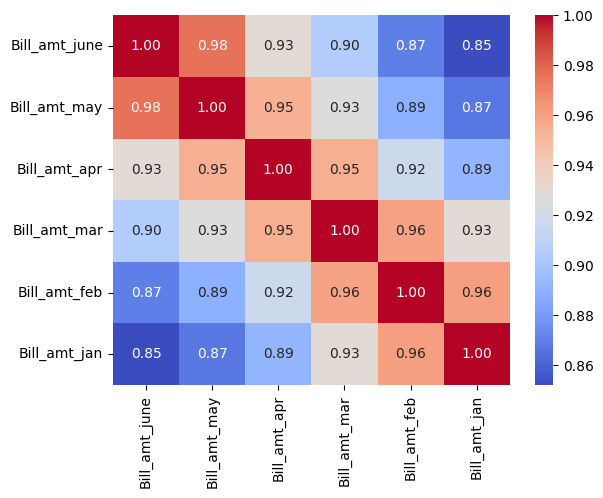

In [31]:
bill_amt_corr = bill_col.corr()
sns.heatmap(bill_amt_corr, annot=True, fmt='.2f', cmap='coolwarm')

##### Observation: Pairplot and correlation matrix suggests that defaulters who had high bill amounts in one month tend to have similarly high bills in just previous months. Spending behavior is consistent over time.

#### Paid amount

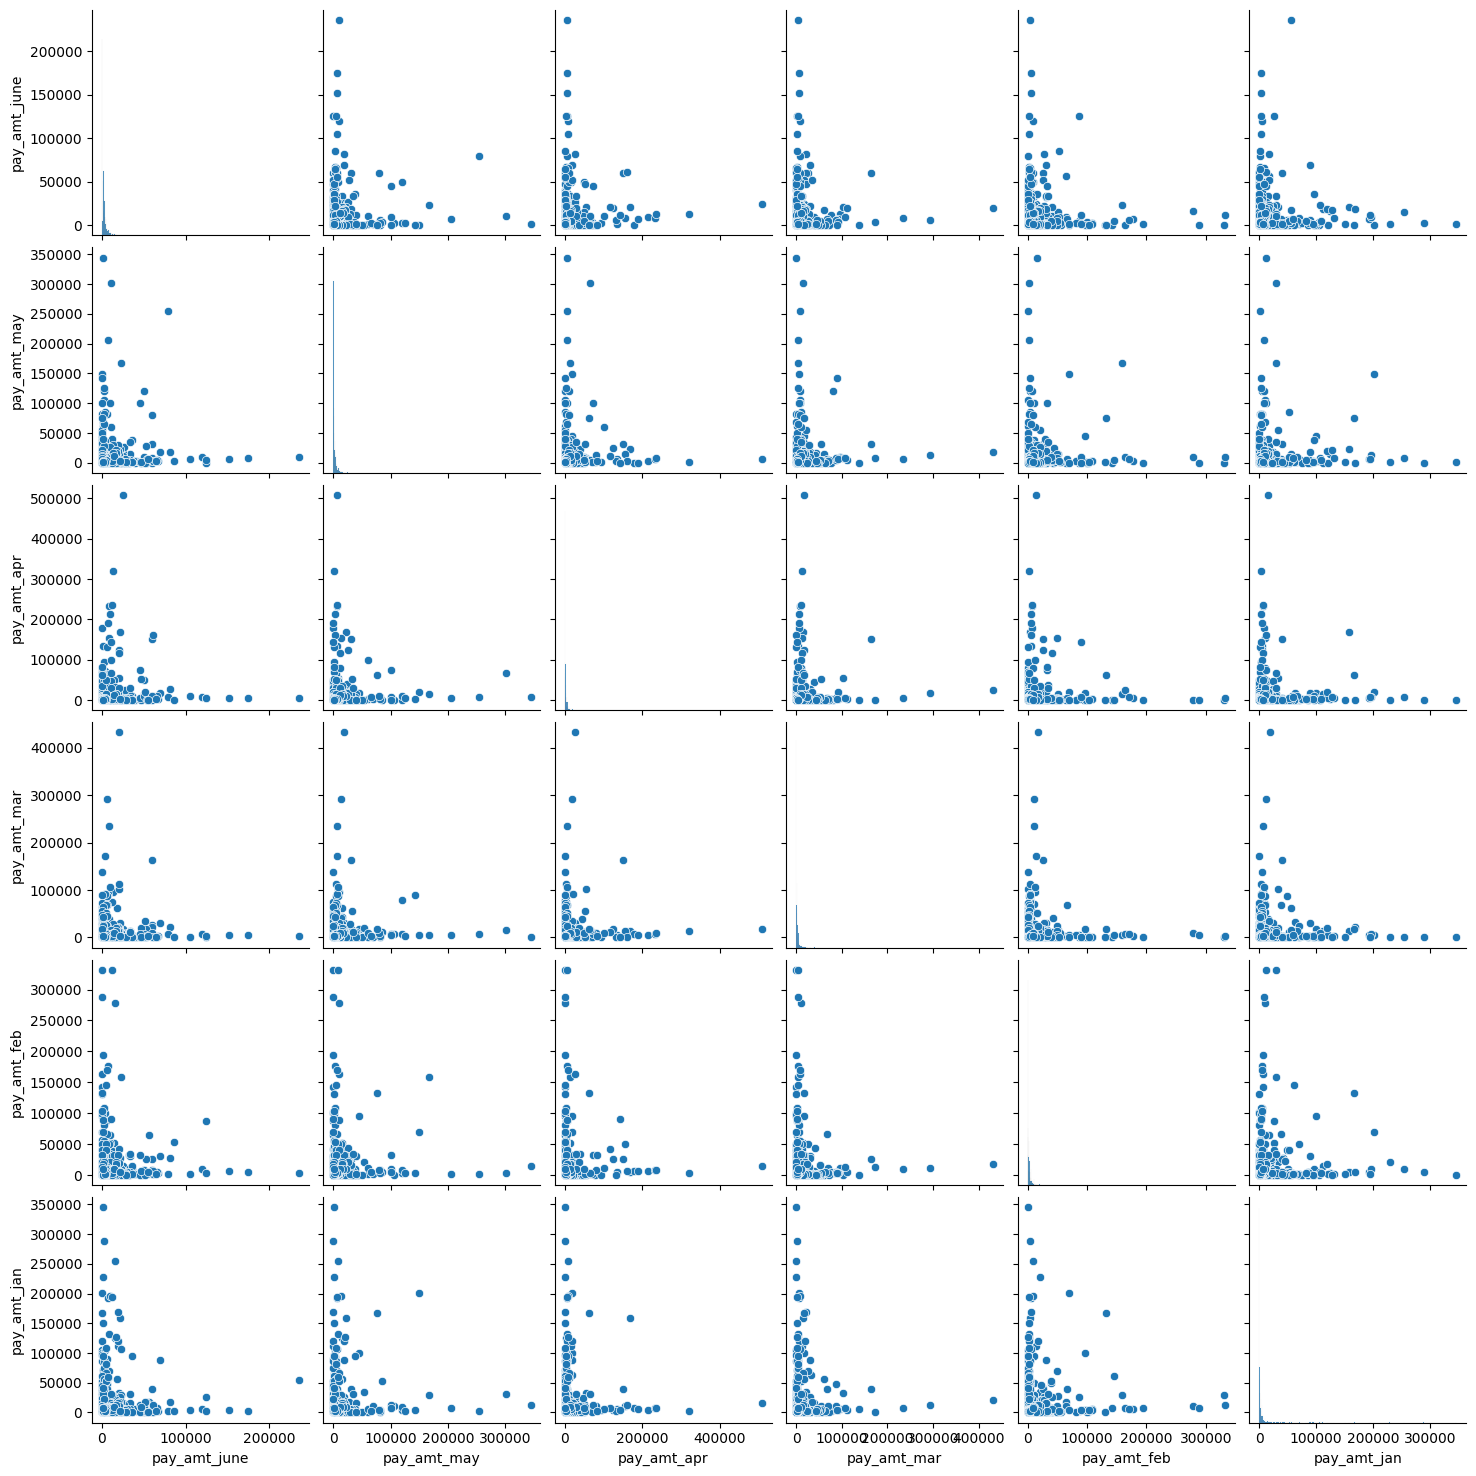

In [32]:
pay_amt_col = df_train.loc[df_train['next_month_default'] == 1,['pay_amt_june', 'pay_amt_may', 'pay_amt_apr', 'pay_amt_mar', 'pay_amt_feb', 'pay_amt_jan']]
sns.pairplot(data = pay_amt_col)

<Axes: >

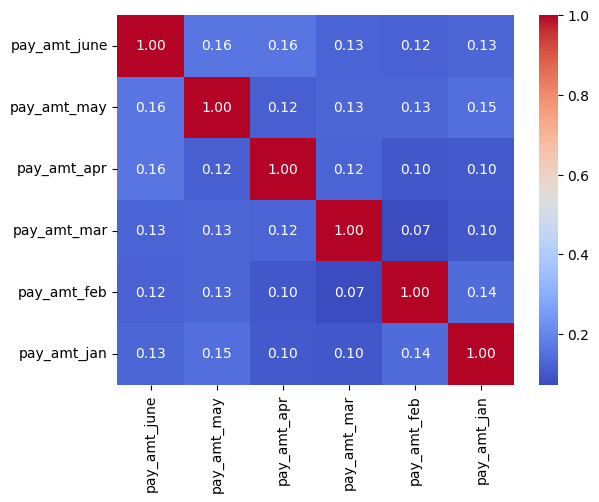

In [33]:
pay_amt_corr = pay_amt_col.corr()
sns.heatmap(pay_amt_corr, annot=True, fmt='.2f', cmap='coolwarm')

##### Observation: This one is obvious. Pair plots and correlation matrix suggests that payment made in a particular month does not correlate to other months meaning defaulters are very irregular in payments.

#### Average bill amount over six months

/tmp/ipykernel_13035/558069902.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="next_month_default", y="AVG_Bill_amt", data=df_train, palette={'1' : 'red', '0' : 'green'})


(-100000.0, 200000.0)

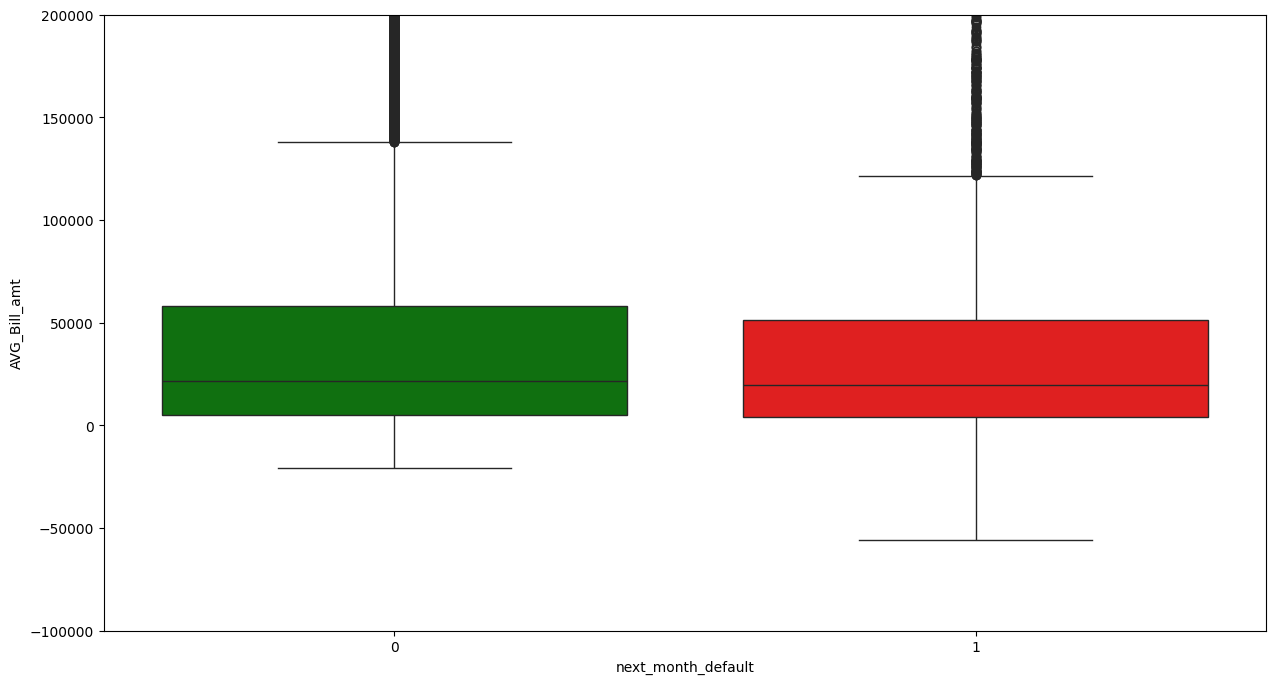

In [34]:
plt.figure(figsize=(15,8))
sns.boxplot(x="next_month_default", y="AVG_Bill_amt", data=df_train, palette={'1' : 'red', '0' : 'green'})
plt.ylim(-100000, 200000)

##### Observation: Box plot shows comparable medians but the highest average bill amount is less for defaulters, in correlation to the credit limit(non-defaulters get to spend more).

#### Pay to bill ratio

/tmp/ipykernel_13035/1259362223.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="next_month_default", y="PAY_TO_BILL_ratio", data=df_train, palette={'1' : 'red', '0' : 'green'})


(-1.0, 2.0)

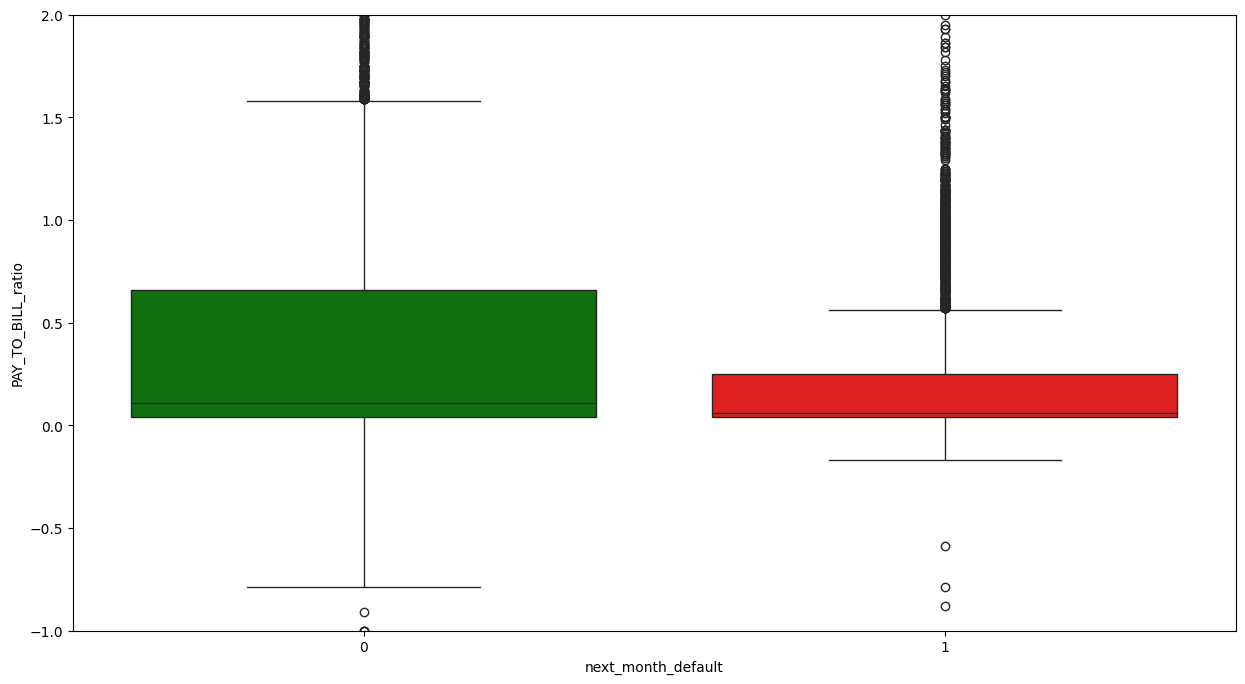

In [35]:
plt.figure(figsize=(15,8))
sns.boxplot(x="next_month_default", y="PAY_TO_BILL_ratio", data=df_train, palette={'1' : 'red', '0' : 'green'})
plt.ylim(-1, 2)

(-10.0, 10.0)

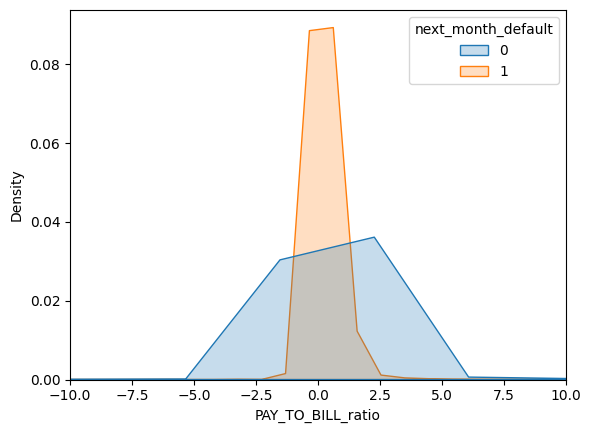

In [36]:
sns.kdeplot(data=df_train, x='PAY_TO_BILL_ratio', hue='next_month_default', fill=True)
plt.xlim(-10, 10)

##### Observation: The kernel density estimate plot shows most of defaulters have the ratio clustered near zero while the non-defaulters are spread out. The negative ratios indicate the bill is already paid in advanced. These low ratio defaulters are high risk people with high debts.

#### Dropping null values in age

In [37]:
df_train.dropna(axis=0, inplace=True)

#### Dropping Customer ID

In [38]:
df_train.drop('Customer_ID', axis=1)

,marriage,sex,education,LIMIT_BAL,age,pay_june,pay_may,pay_apr,pay_mar,pay_feb,...,Bill_amt_jan,pay_amt_june,pay_amt_may,pay_amt_apr,pay_amt_mar,pay_amt_feb,pay_amt_jan,AVG_Bill_amt,PAY_TO_BILL_ratio,next_month_default
0,2,0,2,60000,25,2,2,2,0,0,...,20750.63,2000.21,0.00,1134.85,1821.78,1500.03,1500.24,41511.50,0.03,0
1,2,1,1,290000,24,0,0,-2,-2,-1,...,1350.30,0.00,0.17,0.00,2700.10,0.00,1349.72,2534.50,0.27,0
2,1,0,2,180000,63,0,0,0,0,0,...,52991.51,2086.94,2199.99,1845.66,2000.35,1923.00,1999.78,50422.00,0.04,0
3,1,1,2,210000,43,0,0,0,0,0,...,76945.47,3348.07,3380.91,3400.45,2683.97,2744.00,2892.10,86229.50,0.04,0
4,2,0,1,280000,32,-2,-2,-2,-2,-2,...,1.35,999.78,3186.27,45027.78,2100.09,0.01,0.27,11814.33,0.72,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25242,1,1,2,90000,33,0,0,0,0,2,...,90042.87,2800.18,3999.97,8000.09,5347.85,3699.98,3128.06,82312.50,0.05,0
25243,1,0,2,60000,49,0,0,0,0,0,...,19204.07,22000.17,2187.56,2501.13,2512.09,4004.89,2604.22,41371.67,0.14,1
25244,2,0,1,120000,31,-1,-1,-1,-1,-1,...,9834.64,1315.83,1315.60,533.08,4116.08,9834.10,7100.12,3071.83,1.31,1
25245,1,1,4,390000,40,0,0,0,0,0,...,199013.32,7636.03,5652.86,5544.67,5532.37,5859.09,6818.14,197278.83,0.03,0


### Handling class imbalance

##### Using SMOTE(Synthetic Minority Oversampling Technique) to handle class imbalance in next_month_default

In [39]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
df_train['age'] = df_train['age'].astype('int64') #changing dtype of 'age' from Int64 to int64
x_smote, y_smote = smote.fit_resample(df_train.iloc[:,0:-1], df_train['next_month_default'])
print('Original dataset shape', len(df_train))
print('Resampled dataset shape', len(y_smote))

Original dataset shape 25121
Resampled dataset shape 40674


In [40]:
x_smote

,Customer_ID,marriage,sex,education,LIMIT_BAL,age,pay_june,pay_may,pay_apr,pay_mar,...,Bill_amt_feb,Bill_amt_jan,pay_amt_june,pay_amt_may,pay_amt_apr,pay_amt_mar,pay_amt_feb,pay_amt_jan,AVG_Bill_amt,PAY_TO_BILL_ratio
0,5017,2,0,2,60000,25,2,2,2,0,...,22191.530000,20750.630000,2000.210000,0.000000,1134.850000,1821.780000,1500.030000,1500.240000,41511.500000,0.030000
1,5018,2,1,1,290000,24,0,0,-2,-2,...,2700.960000,1350.300000,0.000000,0.170000,0.000000,2700.100000,0.000000,1349.720000,2534.500000,0.270000
2,5019,1,0,2,180000,63,0,0,0,0,...,51902.560000,52991.510000,2086.940000,2199.990000,1845.660000,2000.350000,1923.000000,1999.780000,50422.000000,0.040000
3,5020,1,1,2,210000,43,0,0,0,0,...,80416.750000,76945.470000,3348.070000,3380.910000,3400.450000,2683.970000,2744.000000,2892.100000,86229.500000,0.040000
4,5021,2,0,1,280000,32,-2,-2,-2,-2,...,2099.770000,1.350000,999.780000,3186.270000,45027.780000,2100.090000,0.010000,0.270000,11814.330000,0.720000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40669,8521,1,0,1,200000,50,1,-1,-1,-1,...,1187.431955,0.054799,2376.494694,1188.072730,0.000000,1188.364848,0.031731,4939.679994,626.480325,2.431177
40670,26007,1,0,1,347893,35,0,0,0,0,...,125309.203021,119542.882045,6866.610024,6642.231331,8572.991953,6320.995994,6385.333376,7928.161464,129852.914274,0.056421
40671,11847,1,1,2,68258,48,1,1,1,1,...,57793.481357,58936.077030,2490.784893,348.422805,3982.819442,2248.336402,2259.975182,2107.057616,56233.459166,0.040000
40672,20369,1,1,2,96768,43,0,0,0,0,...,29603.586303,30680.476565,3218.973343,6302.436233,2941.828184,1984.740403,1984.929183,1661.402331,67755.184270,0.046768


In [41]:
y_smote.value_counts()

next_month_default
0    20337
1    20337
Name: count, dtype: int64

In [42]:
#dropping CustomerID from sampled dataset
x_smote.drop('Customer_ID', axis=1, inplace=True)

##### Recalculating average bill

In [43]:
x_smote['AVG_Bill_amt'] = (x_smote['Bill_amt_jan']+x_smote['Bill_amt_feb']+x_smote['Bill_amt_mar']+x_smote['Bill_amt_apr']+x_smote['Bill_amt_may']+x_smote['Bill_amt_june'])/6

##### Recalculating pay to bill ratio

In [44]:
x_smote['AVG_pay_amt'] = (x_smote['pay_amt_jan']+x_smote['pay_amt_feb']+x_smote['pay_amt_mar']+x_smote['pay_amt_apr']+x_smote['pay_amt_may']+x_smote['pay_amt_june'])/6
x_smote['PAY_TO_BILL_ratio'] = x_smote['AVG_pay_amt'] / x_smote['AVG_Bill_amt']
x_smote.drop('AVG_pay_amt', axis=1, inplace=True)
x_smote.head()

,marriage,sex,education,LIMIT_BAL,age,pay_june,pay_may,pay_apr,pay_mar,pay_feb,...,Bill_amt_feb,Bill_amt_jan,pay_amt_june,pay_amt_may,pay_amt_apr,pay_amt_mar,pay_amt_feb,pay_amt_jan,AVG_Bill_amt,PAY_TO_BILL_ratio
0,2,0,2,60000,25,2,2,2,0,0,...,22191.53,20750.63,2000.21,0.00,1134.85,1821.78,1500.03,1500.24,41511.498333,0.031947
1,2,1,1,290000,24,0,0,-2,-2,-1,...,2700.96,1350.30,0.00,0.17,0.00,2700.10,0.00,1349.72,2535.076667,0.266263
2,1,0,2,180000,63,0,0,0,0,0,...,51902.56,52991.51,2086.94,2199.99,1845.66,2000.35,1923.00,1999.78,50421.683333,0.039850
3,1,1,2,210000,43,0,0,0,0,0,...,80416.75,76945.47,3348.07,3380.91,3400.45,2683.97,2744.00,2892.10,86229.755000,0.035660
4,2,0,1,280000,32,-2,-2,-2,-2,-2,...,2099.77,1.35,999.78,3186.27,45027.78,2100.09,0.01,0.27,11814.253333,0.723902


## Feature Engineering

#### Credit utilization ratio

##### The Credit Utilization Ratio is calculated by dividing the total outstanding bill amount by the total credit limit assigned to the customer. A high utilization ratio suggests that the customer is using a large portion of their available credit which may indicate financial stress or reliance on borrowed funds. A low utilization ratio suggests smart credit use and is viewed more favorably by banks.

In [45]:
#defining average credit utilization ratio
x_smote['AVG_util_ratio'] = x_smote['AVG_Bill_amt'] / x_smote['LIMIT_BAL']

/tmp/ipykernel_13035/703595678.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="next_month_default", y="AVG_util_ratio", data=pd.concat([x_smote, y_smote], axis=1), palette={'1' : 'red', '0' : 'green'})


<Axes: xlabel='next_month_default', ylabel='AVG_util_ratio'>

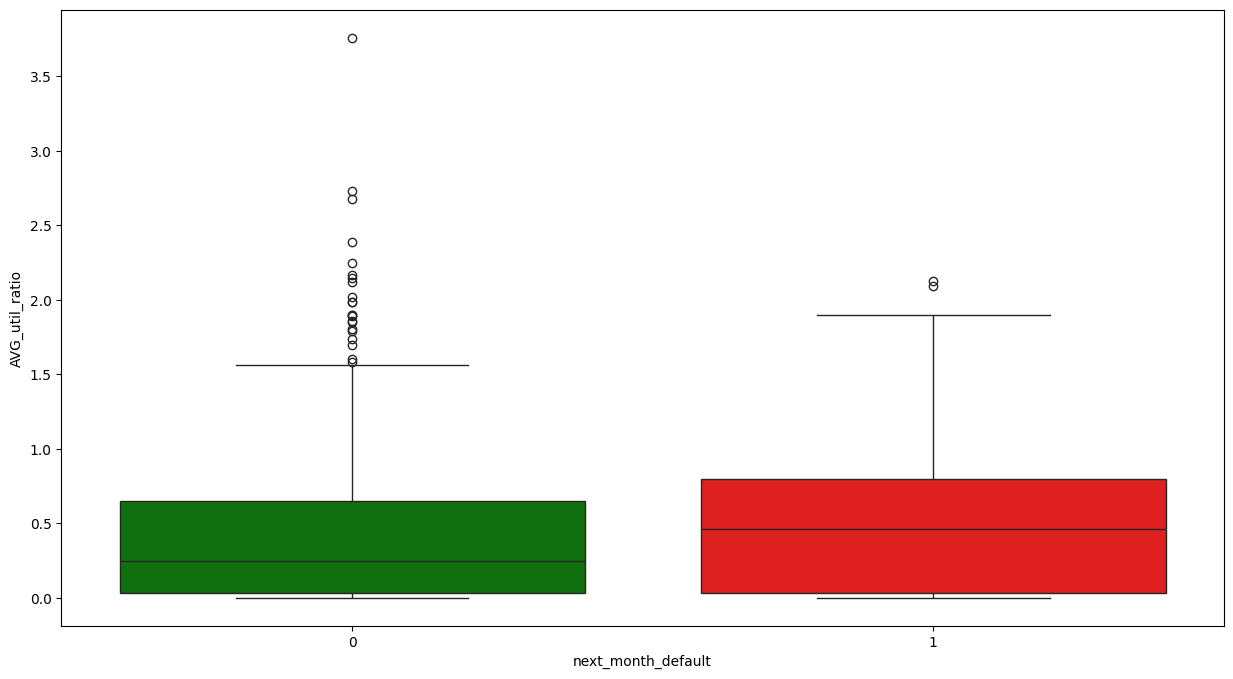

In [46]:
plt.figure(figsize=(15,8))
sns.boxplot(x="next_month_default", y="AVG_util_ratio", data=pd.concat([x_smote, y_smote], axis=1), palette={'1' : 'red', '0' : 'green'})

##### Observation: Median and average of defaulters' average credit utilization is clearly higher than non-defaulters which indicates defaulters' over reliance on borrowed funds.

#### Delinquency streak

##### A Delinquency Streak refers to the longest continuous sequence of months in which a customer failed to make timely payments on their credit card bill.

In [47]:
#Calculating maximum deliquency streak
def compute_delinquency_streak(row):
    streak = 0
    max_streak = 0
    for col in pay_col:
        if row[col] >= 1:
            streak += 1
            max_streak = max(max_streak, streak)
        else:
            streak = 0
    return max_streak

x_smote['max_delinq_streak'] = x_smote.apply(compute_delinquency_streak, axis=1)

In [48]:
x_smote.head()

,marriage,sex,education,LIMIT_BAL,age,pay_june,pay_may,pay_apr,pay_mar,pay_feb,...,pay_amt_june,pay_amt_may,pay_amt_apr,pay_amt_mar,pay_amt_feb,pay_amt_jan,AVG_Bill_amt,PAY_TO_BILL_ratio,AVG_util_ratio,max_delinq_streak
0,2,0,2,60000,25,2,2,2,0,0,...,2000.21,0.00,1134.85,1821.78,1500.03,1500.24,41511.498333,0.031947,0.691858,3
1,2,1,1,290000,24,0,0,-2,-2,-1,...,0.00,0.17,0.00,2700.10,0.00,1349.72,2535.076667,0.266263,0.008742,0
2,1,0,2,180000,63,0,0,0,0,0,...,2086.94,2199.99,1845.66,2000.35,1923.00,1999.78,50421.683333,0.039850,0.280120,0
3,1,1,2,210000,43,0,0,0,0,0,...,3348.07,3380.91,3400.45,2683.97,2744.00,2892.10,86229.755000,0.035660,0.410618,0
4,2,0,1,280000,32,-2,-2,-2,-2,-2,...,999.78,3186.27,45027.78,2100.09,0.01,0.27,11814.253333,0.723902,0.042194,0


/tmp/ipykernel_13035/3162283246.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="next_month_default", y="max_delinq_streak", data=pd.concat([x_smote, y_smote], axis=1), palette={'1' : 'red', '0' : 'green'})


<Axes: xlabel='next_month_default', ylabel='max_delinq_streak'>

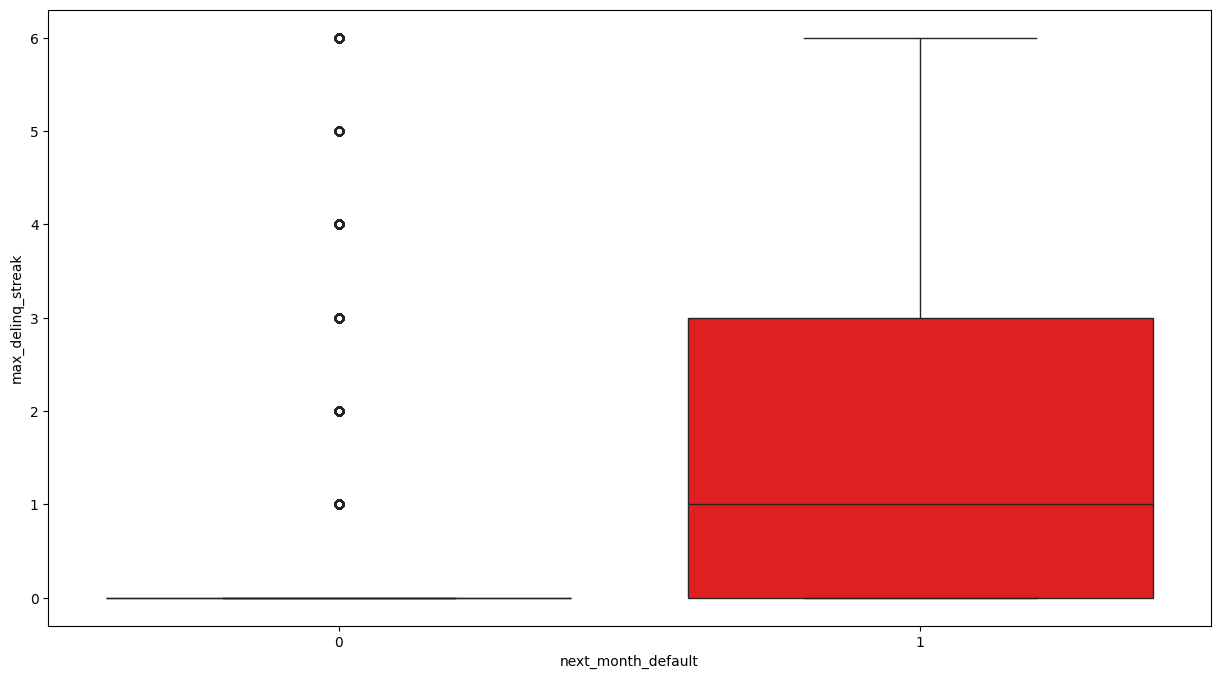

In [49]:
plt.figure(figsize=(15,8))
sns.boxplot(x="next_month_default", y="max_delinq_streak", data=pd.concat([x_smote, y_smote], axis=1), palette={'1' : 'red', '0' : 'green'})

##### Observation: Maximum(ignoring outliers) of delinquency streak for non-defaulters is zero meaning they mostly pay consistently. Defaulters have streaks varying from 0 to 6 months. The IQR (Interquartile Range) for defaulters spans from 0 to 3+ suggesting a broader delinquency behavior. This clearly is a high-value feature.

#### One-hot encoding for marriage, sex, education and pay_m

In [50]:
x_smote.replace({'marriage': {1 : 'married', 2 : 'single', 3 : 'others', 0 : 'non-descp'}, 'sex' : {1 : 'male', 0 : 'female'}, 'education' : {1 : 'graduate', 2 : 'university', 3 : 'high', 4 : 'others'}}, inplace=True)
x_smote.head()

,marriage,sex,education,LIMIT_BAL,age,pay_june,pay_may,pay_apr,pay_mar,pay_feb,...,pay_amt_june,pay_amt_may,pay_amt_apr,pay_amt_mar,pay_amt_feb,pay_amt_jan,AVG_Bill_amt,PAY_TO_BILL_ratio,AVG_util_ratio,max_delinq_streak
0,single,female,university,60000,25,2,2,2,0,0,...,2000.21,0.00,1134.85,1821.78,1500.03,1500.24,41511.498333,0.031947,0.691858,3
1,single,male,graduate,290000,24,0,0,-2,-2,-1,...,0.00,0.17,0.00,2700.10,0.00,1349.72,2535.076667,0.266263,0.008742,0
2,married,female,university,180000,63,0,0,0,0,0,...,2086.94,2199.99,1845.66,2000.35,1923.00,1999.78,50421.683333,0.039850,0.280120,0
3,married,male,university,210000,43,0,0,0,0,0,...,3348.07,3380.91,3400.45,2683.97,2744.00,2892.10,86229.755000,0.035660,0.410618,0
4,single,female,graduate,280000,32,-2,-2,-2,-2,-2,...,999.78,3186.27,45027.78,2100.09,0.01,0.27,11814.253333,0.723902,0.042194,0


In [51]:
x_smote = pd.get_dummies(x_smote, columns=['marriage', 'sex', 'education'])
x_smote.head()

,LIMIT_BAL,age,pay_june,pay_may,pay_apr,pay_mar,pay_feb,pay_jan,Bill_amt_june,Bill_amt_may,...,marriage_married,marriage_non-descp,marriage_others,marriage_single,sex_female,sex_male,education_graduate,education_high,education_others,education_university
0,60000,25,2,2,2,0,0,0,60323.86,60728.22,...,False,False,False,True,True,False,False,False,False,True
1,290000,24,0,0,-2,-2,-1,0,11157.67,0.00,...,False,False,False,True,False,True,True,False,False,False
2,180000,63,0,0,0,0,0,0,47930.96,48921.91,...,True,False,False,False,True,False,False,False,False,True
3,210000,43,0,0,0,0,0,0,91152.44,92916.01,...,True,False,False,False,False,True,False,False,False,True
4,280000,32,-2,-2,-2,-2,-2,-2,19666.40,999.04,...,False,False,False,True,True,False,True,False,False,False


In [52]:
x_smote.drop(['marriage_non-descp', 'sex_female', 'education_others'], axis=1, inplace=True)

In [53]:
x_smote = pd.get_dummies(x_smote, columns=['pay_jan', 'pay_feb', 'pay_mar', 'pay_apr', 'pay_may', 'pay_june'], drop_first=True)
x_smote.head()

,LIMIT_BAL,age,Bill_amt_june,Bill_amt_may,Bill_amt_apr,Bill_amt_mar,Bill_amt_feb,Bill_amt_jan,pay_amt_june,pay_amt_may,...,pay_june_-1,pay_june_0,pay_june_1,pay_june_2,pay_june_3,pay_june_4,pay_june_5,pay_june_6,pay_june_7,pay_june_8
0,60000,25,60323.86,60728.22,56472.74,28602.01,22191.53,20750.63,2000.21,0.00,...,False,False,False,True,False,False,False,False,False,False
1,290000,24,11157.67,0.00,0.88,0.65,2700.96,1350.30,0.00,0.17,...,False,True,False,False,False,False,False,False,False,False
2,180000,63,47930.96,48921.91,50034.26,50748.90,51902.56,52991.51,2086.94,2199.99,...,False,True,False,False,False,False,False,False,False,False
3,210000,43,91152.44,92916.01,90652.30,85295.56,80416.75,76945.47,3348.07,3380.91,...,False,True,False,False,False,False,False,False,False,False
4,280000,32,19666.40,999.04,3186.48,44932.48,2099.77,1.35,999.78,3186.27,...,False,False,False,False,False,False,False,False,False,False


In [54]:
#dropping rows with inf or NaN
x_smote = x_smote.replace([np.inf, -np.inf], np.nan)
mask = ~x_smote.isnull().any(axis=1)
x_smote = x_smote[mask]
y_smote = y_smote[mask]

## Implementing Logistic Regression

### Metrics Used

##### We will be using F2-score as evaluation metrics. F2-score weighs recall higher than precision. This means we are more concerned about catching as many defaulters as possible (minimizing false negatives). Also, we are fine with flagging a few more non-defaulters by mistake (tolerating false positives). This is typical in credit risk if the cost of missing a defaulter is high (e.g. issuing a loan to someone who doesn’t repay).

In [55]:
x_smote_log = x_smote.copy()

In [56]:
#Standardizing data
scaler = StandardScaler()
x_smote_log = scaler.fit_transform(x_smote_log)

In [57]:
X_train, X_test, y_train, y_test = train_test_split(x_smote_log, y_smote, test_size=0.2, random_state=1, stratify = y_smote)

In [58]:
param_grid = {'penalty':['l1','l2'], 'C' : [1000]}

In [59]:
f2_scorer = make_scorer(fbeta_score, beta=2)
grid_lr = GridSearchCV(LogisticRegression(solver='liblinear', max_iter=1000), param_grid, scoring = f2_scorer, n_jobs = 2, cv = 10)
grid_lr.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=LogisticRegression(max_iter=1000, solver='liblinear'),
             n_jobs=2, param_grid={'C': [1000], 'penalty': ['l1', 'l2']},
             scoring=make_scorer(fbeta_score, response_method='predict', beta=2))

In [60]:
grid_lr.best_params_

{'C': 1000, 'penalty': 'l2'}

In [61]:
optimized_lr = grid_lr.best_estimator_

In [62]:
test_pred_lr = optimized_lr.predict(X_test)
test_prob_lr = optimized_lr.predict_proba(X_test)[:, 1]
test_acc_lr = accuracy_score(y_test, test_pred_lr)
test_pre_lr = precision_score(y_test, test_pred_lr)
test_rec_lr = recall_score(y_test, test_pred_lr)
test_f1_lr = fbeta_score(y_test, test_pred_lr, beta=1)
test_f2_lr = fbeta_score(y_test, test_pred_lr, beta=2)
test_roc_lr = roc_auc_score(y_test, test_prob_lr)

print("Results on test data:")
print("Accuracy", test_acc_lr)
print("Precision", test_pre_lr)
print("Recall", test_rec_lr)
print("f1 score", test_f1_lr)
print("f2 score", test_f2_lr)
print("roc score", test_roc_lr)

Results on test data:
Accuracy 0.7576690895651103
Precision 0.7902466057079524
Recall 0.7021171836533727
f1 score 0.7435797158128015
f2 score 0.718134662839301
roc score 0.8364619058113423


[[3298  757]
 [1210 2852]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

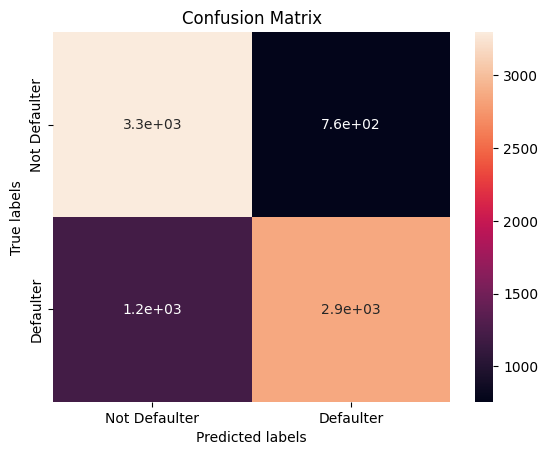

In [63]:
# confusion matrix for test data
labels = ['Not Defaulter', 'Defaulter']
cm = confusion_matrix(y_test, test_pred_lr)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)


Above is confusion matrix for test data

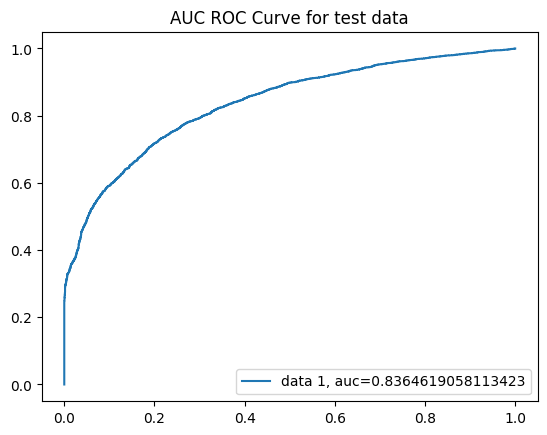

In [64]:
fpr, tpr, _ = roc_curve(y_test, test_prob_lr)
plt.plot(fpr,tpr,label="data 1, auc="+str(test_roc_lr))
plt.title('AUC ROC Curve for test data')
plt.legend(loc=4)
plt.show()

## Implementing Decision Tree

In [65]:
x_smote_dt = x_smote.copy()

In [66]:
X_train, X_test, y_train, y_test = train_test_split(x_smote_dt, y_smote, test_size=0.2, random_state=1, stratify = y_smote)

In [67]:
param_grid = {'max_depth': [5,10,20,30,50,100,1000,None]}

In [68]:
grid_dt = GridSearchCV(DecisionTreeClassifier(), param_grid, scoring = f2_scorer, n_jobs = -1, cv = 3)
grid_dt.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 20, 30, 50, 100, 1000, None]},
             scoring=make_scorer(fbeta_score, response_method='predict', beta=2))

In [69]:
grid_dt.best_params_

{'max_depth': None}

In [70]:
optimized_dt = grid_dt.best_estimator_

In [71]:
test_pred_dt = optimized_dt.predict(X_test)
test_prob_dt = optimized_dt.predict_proba(X_test)[:, 1]
test_acc_dt = accuracy_score(y_test, test_pred_dt)
test_pre_dt = precision_score(y_test, test_pred_dt)
test_rec_dt = recall_score(y_test, test_pred_dt)
test_f1_dt = fbeta_score(y_test, test_pred_dt, beta=1)
test_f2_dt = fbeta_score(y_test, test_pred_dt, beta=2)
test_roc_dt = roc_auc_score(y_test, test_prob_dt)

print("Results on test data:")
print("Accuracy", test_acc_dt)
print("Precision", test_pre_dt)
print("Recall", test_rec_dt)
print("f1 score", test_f1_dt)
print("f2 score", test_f2_dt)
print("roc score", test_roc_dt)

Results on test data:
Accuracy 0.7821855365282739
Precision 0.7745332695069411
Recall 0.7966518956179222
f1 score 0.7854368932038835
f2 score 0.792127680407324
roc score 0.7821730501517478


[[3113  942]
 [ 826 3236]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

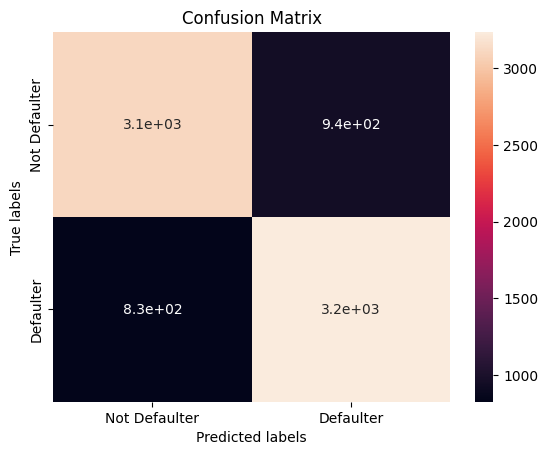

In [72]:
# confusion matrix for test data
labels = ['Not Defaulter', 'Defaulter']
cm = confusion_matrix(y_test, test_pred_dt)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

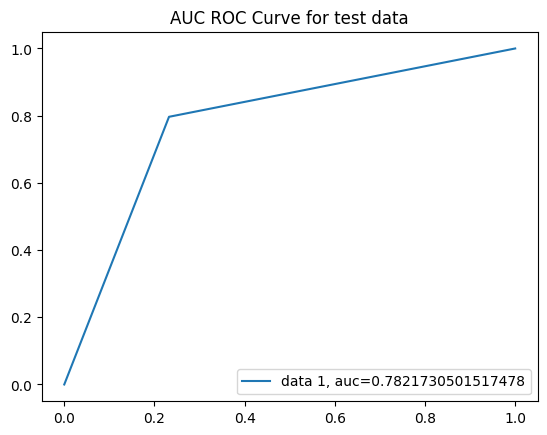

In [73]:
fpr, tpr, _ = roc_curve(y_test, test_prob_dt)
plt.plot(fpr,tpr,label="data 1, auc="+str(test_roc_dt))
plt.title('AUC ROC Curve for test data')
plt.legend(loc=4)
plt.show()

## Implementing Random Forrest

In [74]:
x_smote_rf = x_smote.copy()

In [75]:
X_train, X_test, y_train, y_test = train_test_split(x_smote_rf, y_smote, test_size=0.2, random_state=1, stratify = y_smote)

In [76]:
param_grid = {'n_estimators': [10, 20, 25, 50]}

In [77]:
grid_rf = GridSearchCV(RandomForestClassifier(), param_grid, scoring = f2_scorer, n_jobs = -1, cv = 3)
grid_rf.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'n_estimators': [10, 20, 25, 50]},
             scoring=make_scorer(fbeta_score, response_method='predict', beta=2))

In [78]:
grid_rf.best_params_

{'n_estimators': 50}

In [79]:
optimized_rf = grid_rf.best_estimator_

In [80]:
test_pred_rf = optimized_rf.predict(X_test)
test_prob_rf = optimized_rf.predict_proba(X_test)[:, 1]
test_acc_rf = accuracy_score(y_test, test_pred_rf)
test_pre_rf = precision_score(y_test, test_pred_rf)
test_rec_rf = recall_score(y_test, test_pred_rf)
test_f1_rf = fbeta_score(y_test, test_pred_rf, beta=1)
test_f2_rf = fbeta_score(y_test, test_pred_rf, beta=2)
test_roc_rf = roc_auc_score(y_test, test_prob_rf)

print("Results on test data:")
print("Accuracy", test_acc_rf)
print("Precision", test_pre_rf)
print("Recall", test_rec_rf)
print("f1 score", test_f1_rf)
print("f2 score", test_f2_rf)
print("roc score", test_roc_rf)

Results on test data:
Accuracy 0.8561044720956018
Precision 0.8768229166666667
Recall 0.828902018709995
f1 score 0.8521893191597064
f2 score 0.8380625248904818
roc score 0.9349114617388553


[[3582  473]
 [ 695 3367]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

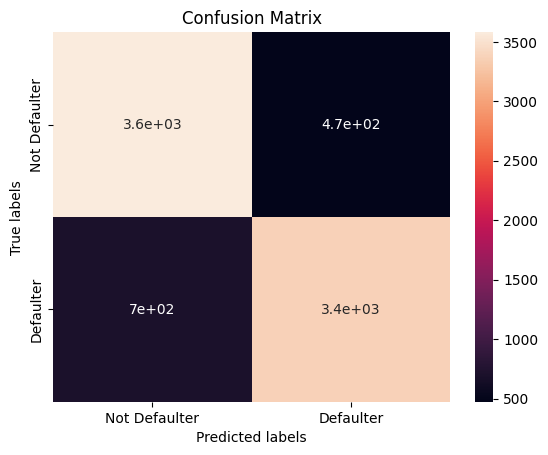

In [81]:
# confusion matrix for test data
labels = ['Not Defaulter', 'Defaulter']
cm = confusion_matrix(y_test, test_pred_rf)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

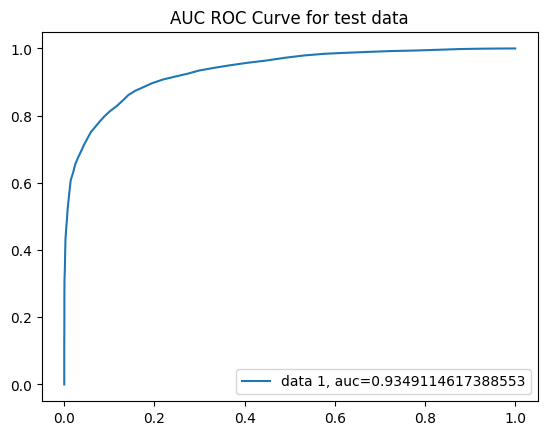

In [82]:
fpr, tpr, _ = roc_curve(y_test, test_prob_rf)
plt.plot(fpr,tpr,label="data 1, auc="+str(test_roc_rf))
plt.title('AUC ROC Curve for test data')
plt.legend(loc=4)
plt.show()

## Implementing gradient boosting(XGBoost)

In [83]:
x_smote_xgb = x_smote.copy()

In [84]:
X_train, X_test, y_train, y_test = train_test_split(x_smote_xgb, y_smote, test_size=0.2, random_state=1, stratify = y_smote)

In [85]:
param_grid = {'n_estimators': [1000], 'learning_rate': [0.01, 0.05, 0.1], 'max_depth': [10, 15, 20]}

In [86]:
grid_xgb = GridSearchCV(XGBClassifier(), param_grid, scoring = f2_scorer, n_jobs = -1, cv = 5)
grid_xgb.fit(X_train, y_train)

/home/shreyk/.local/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=Non...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [10, 15, 20], 'n_estimators': [1000]},
             scoring=make_scorer(fbeta_score, response_method='predict', beta=2))

In [87]:
grid_xgb.best_params_

{'learning_rate': 0.1, 'max_depth': 15, 'n_estimators': 1000}

In [88]:
optimized_xgb = grid_xgb.best_estimator_

In [89]:
test_pred_xgb = optimized_xgb.predict(X_test)
test_prob_xgb = optimized_xgb.predict_proba(X_test)[:, 1]
test_acc_xgb = accuracy_score(y_test, test_pred_xgb)
test_pre_xgb = precision_score(y_test, test_pred_xgb)
test_rec_xgb = recall_score(y_test, test_pred_xgb)
test_f1_xgb = fbeta_score(y_test, test_pred_xgb, beta=1)
test_f2_xgb = fbeta_score(y_test, test_pred_xgb, beta=2)
test_roc_xgb = roc_auc_score(y_test, test_prob_xgb)

print("Results on test data:")
print("Accuracy", test_acc_xgb)
print("Precision", test_pre_xgb)
print("Recall", test_rec_xgb)
print("f1 score", test_f1_xgb)
print("f2 score", test_f2_xgb)
print("roc score", test_roc_xgb)

Results on test data:
Accuracy 0.8806209190587656
Precision 0.8936116060066175
Recall 0.8643525356967011
f1 score 0.8787385809035164
f2 score 0.870050056995589
roc score 0.9494218467028627


[[3637  418]
 [ 551 3511]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

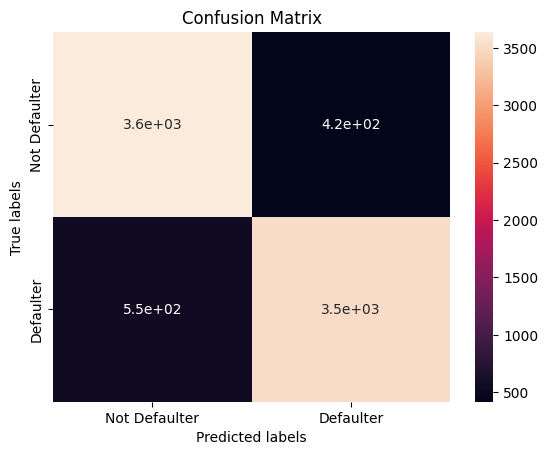

In [90]:
# confusion matrix for test data
labels = ['Not Defaulter', 'Defaulter']
cm = confusion_matrix(y_test, test_pred_xgb)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

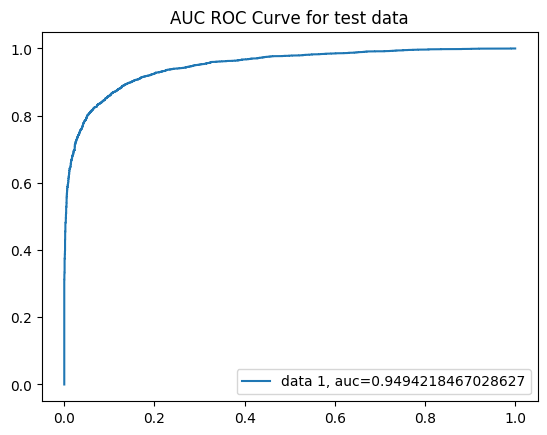

In [91]:
fpr, tpr, _ = roc_curve(y_test, test_prob_xgb)
plt.plot(fpr,tpr,label="data 1, auc="+str(test_roc_xgb))
plt.title('AUC ROC Curve for test data')
plt.legend(loc=4)
plt.show()

## Evaluating Models

In [92]:
classifiers = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Xgboost']
test_accuracy = [test_acc_lr, test_acc_dt, test_acc_rf, test_acc_xgb]
precision_score = [test_pre_lr, test_pre_dt, test_pre_rf, test_pre_xgb]
recall_score = [test_rec_lr, test_rec_dt, test_rec_rf, test_rec_xgb]
f1_score = [test_f1_lr, test_f1_dt, test_f1_rf, test_f1_xgb]
f2_score = [test_f2_lr, test_f2_dt, test_f2_rf, test_f2_xgb]
auc_score = [test_roc_lr, test_roc_dt, test_roc_rf, test_roc_xgb]

In [93]:
pd.DataFrame({'Classifier':classifiers, 'Test Accuracy': test_accuracy, 'Precision Score': precision_score, 'Recall Score': recall_score, 'F1 Score': f1_score, 'F2 Score': f2_score, 'ROC-AUC Score': auc_score })

,Classifier,Test Accuracy,Precision Score,Recall Score,F1 Score,F2 Score,ROC-AUC Score
0,Logistic Regression,0.757669,0.790247,0.702117,0.743580,0.718135,0.836462
1,Decision Tree,0.782186,0.774533,0.796652,0.785437,0.792128,0.782173
2,Random Forest,0.856104,0.876823,0.828902,0.852189,0.838063,0.934911
3,Xgboost,0.880621,0.893612,0.864353,0.878739,0.870050,0.949422


XGBoost shows best performance metrics in all on the test data.

### Feature importance in the best model

In [94]:
explainer = shap.TreeExplainer(optimized_xgb)
shap_values = explainer.shap_values(X_train)

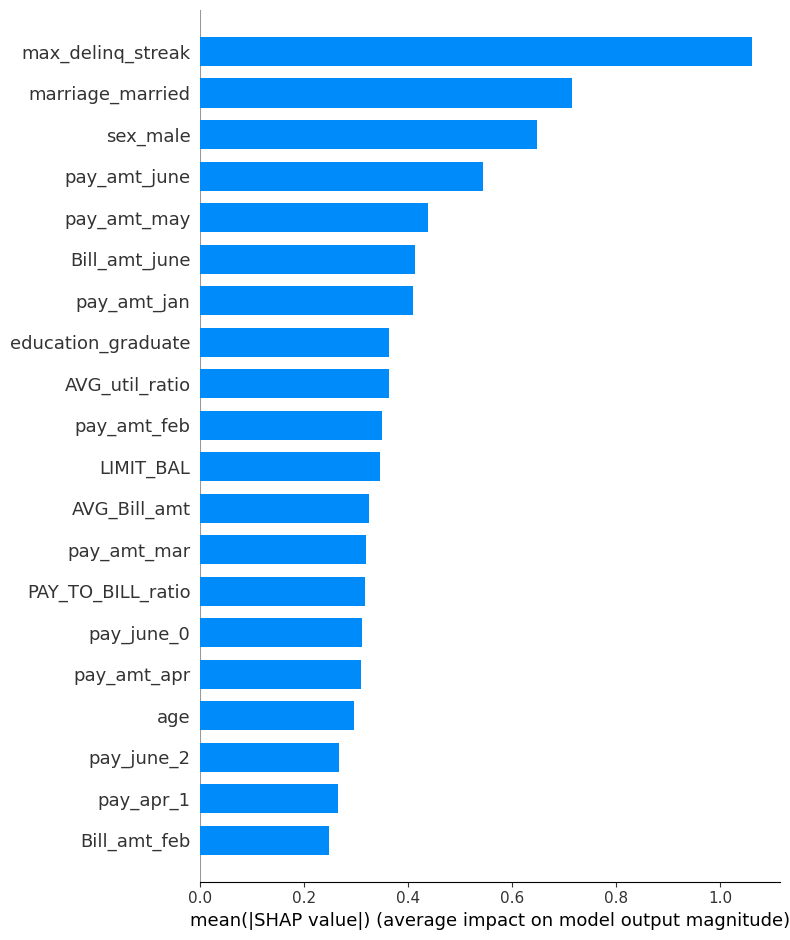

In [95]:
shap.summary_plot(shap_values, X_train, plot_type='bar')

##### Observation: As noted earlier maximum delinquency streak is the strongest predictor, indicates that longer consecutive months of delayed payments is a major signal of default risk. High importance of pay_amt_june shows that most recent repayment activity strongly influences the prediction. Demographic features like marriage_married and sex_male are influential.

### Optimal Classification Threshold

### Understand the Cost of Errors

| **Case**               | **Meaning**                                       | **Business Risk**                                                   |
|------------------------|---------------------------------------------------|----------------------------------------------------------------------|
| **False Positive (FP)**| Predict default but customer actually repays      | Lost opportunity: rejected a good customer → lost revenue         |
| **False Negative (FN)**| Predict non-default but customer actually defaults| High financial loss: approved credit to a risky customer          |

#### Interpretation

- A **false positive** may hurt customer trust and reduce profits.
- A **false negative** may cause **direct financial loss**, which is often much riskier for a bank.

In credit risk, minimizing **false negatives** is usually more important. A bank might choose a lower threshold as it will catch more default, recall increases. Below is shown relationship between F2 scores and Threshold.

In [96]:
thresholds = np.arange(0.0, 1.0, 0.01)
scores = []

for t in thresholds:
    y_pred = (test_prob_xgb >= t).astype(int)
    f2 = fbeta_score(y_test, y_pred, beta=2)  # F2 prioritizes recall
    scores.append(f2)
    if t == 0.5:
        score_05 = f2

# Find threshold with best F2 score
best_threshold = thresholds[np.argmax(scores)]
print(f"Best threshold based on F2: {best_threshold:.2f}")

Best threshold based on F2: 0.04


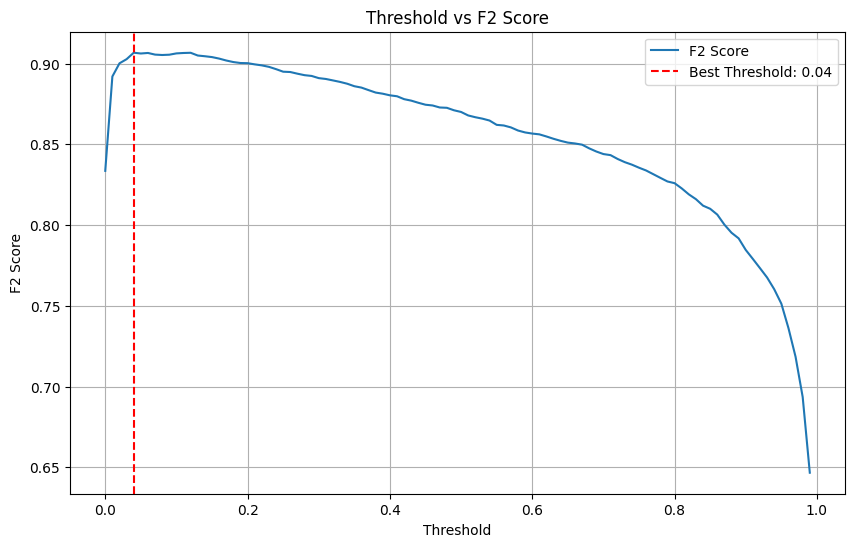

In [97]:
plt.figure(figsize=(10, 6))
plt.plot(thresholds, scores, label='F2 Score')
plt.axvline(best_threshold, color='red', linestyle='--', label=f'Best Threshold: {best_threshold:.2f}')
plt.xlabel('Threshold')
plt.ylabel('F2 Score')
plt.title('Threshold vs F2 Score')
plt.legend()
plt.grid(True)
plt.show()

Above plot shows a very small threshold maximize F2 score. But choosing this as threshold may generate lots of false positives which degrades customer trust. A threshold of 0.50 is chosen to maintain a balance.

In [98]:
print(f'A threshold of 0.5 gives a F2 score of {score_05:.2f}')

A threshold of 0.5 gives a F2 score of 0.87


## Final Predictions on validation dataset

### Applying transformations

In [99]:
id_other = (df_valid['education'] == 0) | (df_valid['education'] == 4) | (df_valid['education'] == 5) | (df_valid['education'] == 6)
df_valid.loc[id_other, 'education'] = 4

In [100]:
df_valid.rename(columns={'pay_0':'pay_june','pay_2':'pay_may','pay_3':'pay_apr','pay_4':'pay_mar','pay_5':'pay_feb','pay_6':'pay_jan'},inplace=True)
df_valid.rename(columns={'Bill_amt1':'Bill_amt_june','Bill_amt2':'Bill_amt_may','Bill_amt3':'Bill_amt_apr','Bill_amt4':'Bill_amt_mar','Bill_amt5':'Bill_amt_feb','Bill_amt6':'Bill_amt_jan'}, inplace = True)
df_valid.rename(columns={'pay_amt1':'pay_amt_june','pay_amt2':'pay_amt_may','pay_amt3':'pay_amt_apr','pay_amt4':'pay_amt_mar','pay_amt5':'pay_amt_feb','pay_amt6':'pay_amt_jan'},inplace=True)

In [101]:
df_valid['age'] = df_valid['age'].astype('int64')

In [102]:
X = df_valid.copy()

In [103]:
X.drop('Customer_ID', axis=1, inplace=True)

In [104]:
X['AVG_util_ratio'] = X['AVG_Bill_amt'] / X['LIMIT_BAL']

In [105]:
X['max_delinq_streak'] = X.apply(compute_delinquency_streak, axis=1)

In [106]:
X.replace({'marriage': {1 : 'married', 2 : 'single', 3 : 'others', 0 : 'non-descp'}, 'sex' : {1 : 'male', 0 : 'female'}, 'education' : {1 : 'graduate', 2 : 'university', 3 : 'high', 4 : 'others'}}, inplace=True)

In [107]:
X = pd.get_dummies(X, columns=['marriage', 'sex', 'education'])

In [108]:
X.drop(['marriage_non-descp', 'sex_female', 'education_others'], axis=1, inplace=True)

In [109]:
X = pd.get_dummies(X, columns=['pay_jan', 'pay_feb', 'pay_mar', 'pay_apr', 'pay_may', 'pay_june'], drop_first=True)


In [110]:
not_in_valid = ['pay_jan_1', 'pay_jan_8', 'pay_feb_1', 'pay_feb_6', 'pay_mar_6', 'pay_apr_8', 'pay_may_8']
for col in not_in_valid:
    X[col] = False

### Saving Results

In [111]:
y_pred = optimized_xgb.predict(X[list(X_train.columns)])

In [112]:
final_df = pd.concat({'Customer_ID': df_valid['Customer_ID'], 'next_month_default': pd.Series(y_pred).reset_index(drop=True)}, axis=1)
final_df.to_csv("final_predictions.csv", index=False)